In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## 0. Load Data

In [2]:
data = pd.read_csv('../data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## 1. Data Analysis: First Sight

### How is the date distribuited?

In [9]:
data

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


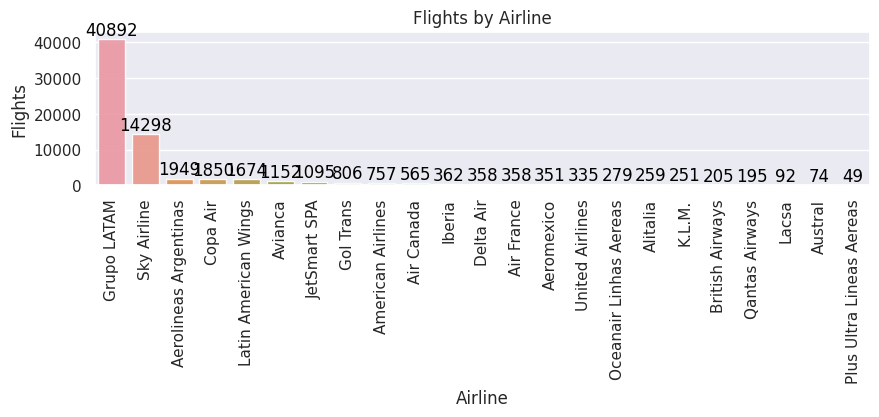

In [12]:


flights_by_airline = data['OPERA'].value_counts().reset_index()
flights_by_airline.columns = ['Airline', 'Flights']

plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
barplot = sns.barplot(x='Airline', y='Flights', data=flights_by_airline, alpha=0.9)

# Adding the values on top of the bars
for index, row in flights_by_airline.iterrows():
    barplot.text(index, row.Flights, row.Flights, color='black', ha="center", va="bottom")


plt.title('Flights by Airline')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

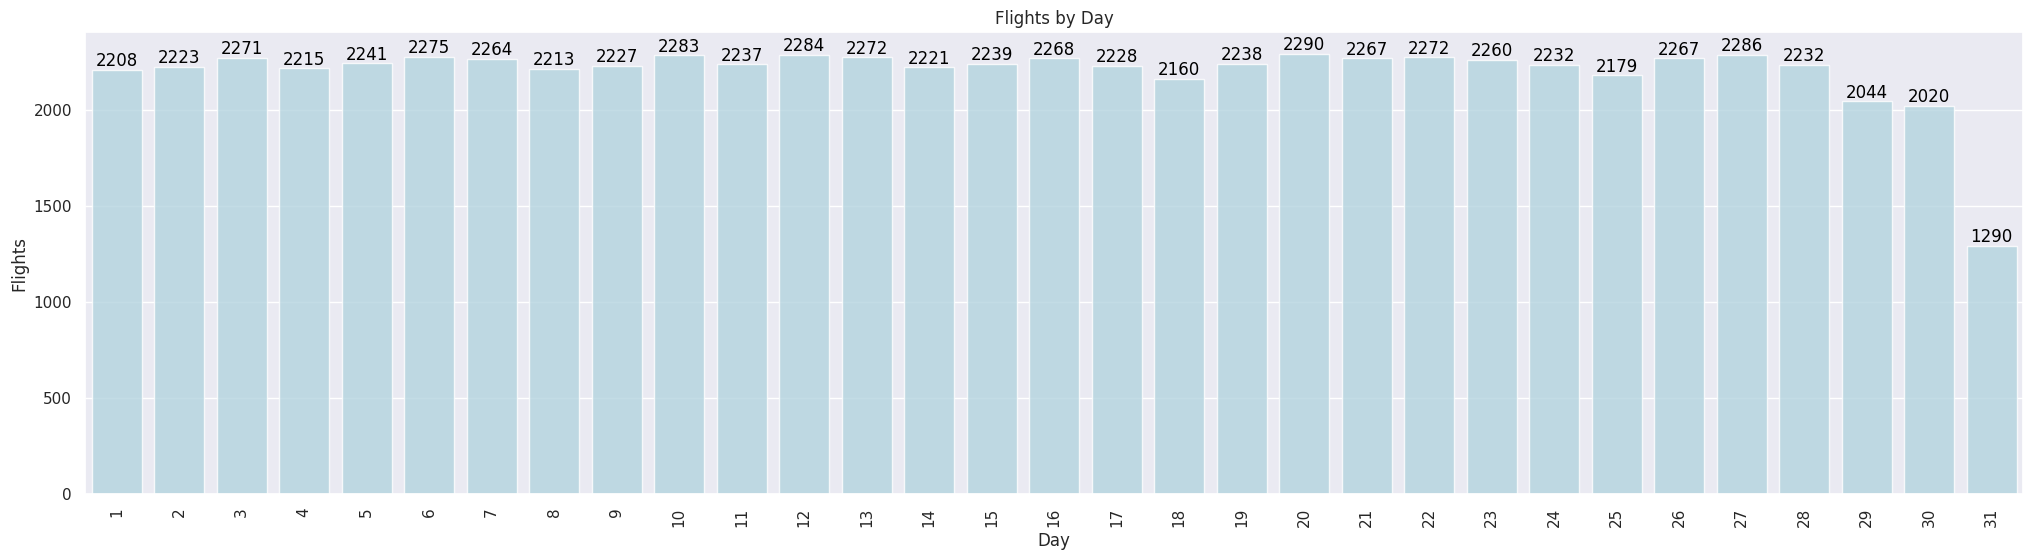

In [22]:
flights_by_day = data['DIA'].value_counts().reset_index()
flights_by_day.columns = ['Day', 'Flights']

plt.figure(figsize=(25, 6))
sns.set(style="darkgrid")
barplot = sns.barplot(x='Day', y='Flights', data=flights_by_day, color='lightblue', alpha=0.8)

# Adding the values on top of the bars
for index, row in flights_by_day.iterrows():
    barplot.text(row.Day - 1, row.Flights, row.Flights, color='black', ha="center", va="bottom")

plt.title('Flights by Day')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation=90)
plt.show()

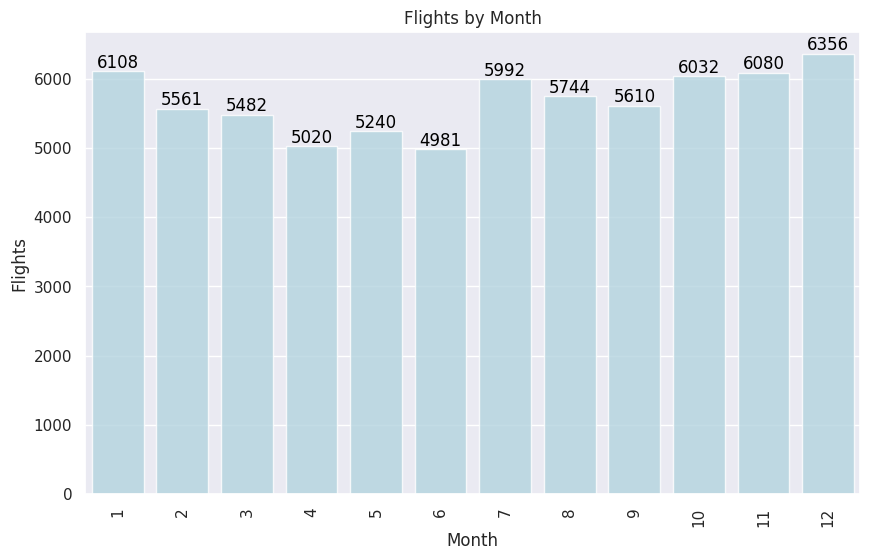

In [17]:
flights_by_month = data['MES'].value_counts().reset_index()
flights_by_month.columns = ['Month', 'Flights']

plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
barplot = sns.barplot(x='Month', y='Flights', data=flights_by_month, color='lightblue', alpha=0.8)

# Adding the values on top of the bars
for index, row in flights_by_month.iterrows():
    barplot.text(row.Month -1, row.Flights, row.Flights, color='black', ha="center", va="bottom")

plt.title('Flights by Month')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [26]:
data['DIANOM'].value_counts()

Viernes      10292
Jueves       10251
Lunes        10131
Domingo       9796
Miercoles     9722
Martes        9662
Sabado        8352
Name: DIANOM, dtype: int64

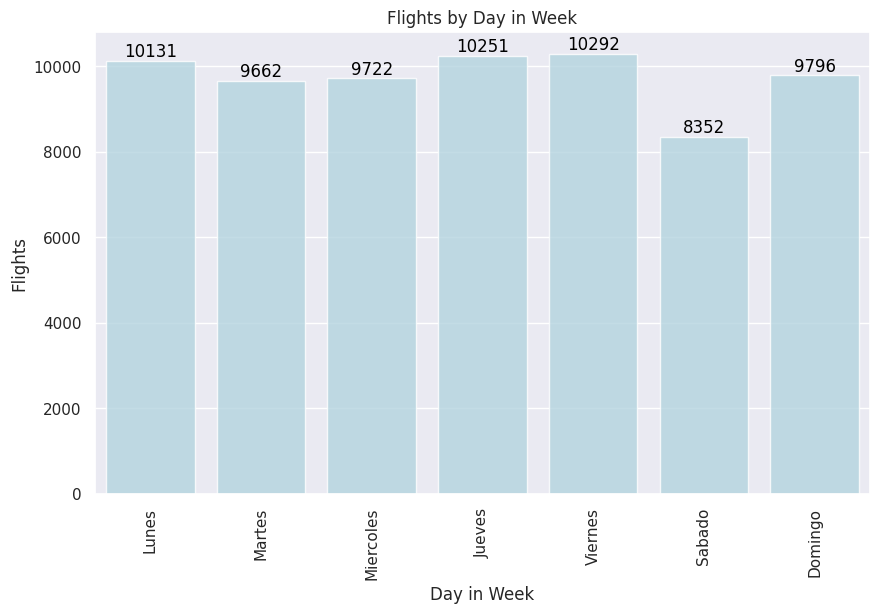

In [27]:
# Define the correct order for the days of the week in Spanish
correct_day_order = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

# Count the occurrences of each day (assuming this has already been done)
flights_by_day_in_week = data['DIANOM'].value_counts()

# Reorder the data according to the correct order of days in Spanish
flights_by_day_in_week = flights_by_day_in_week.reindex(correct_day_order)

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
barplot = sns.barplot(x=flights_by_day_in_week.index, y=flights_by_day_in_week.values, color='lightblue', alpha=0.8)

# Adding the values on top of the bars
for index, value in enumerate(flights_by_day_in_week.values):
    barplot.text(index, value, value, color='black', ha="center", va="bottom")

plt.title('Flights by Day in Week')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day in Week', fontsize=12)
plt.xticks(rotation=90)
plt.show()


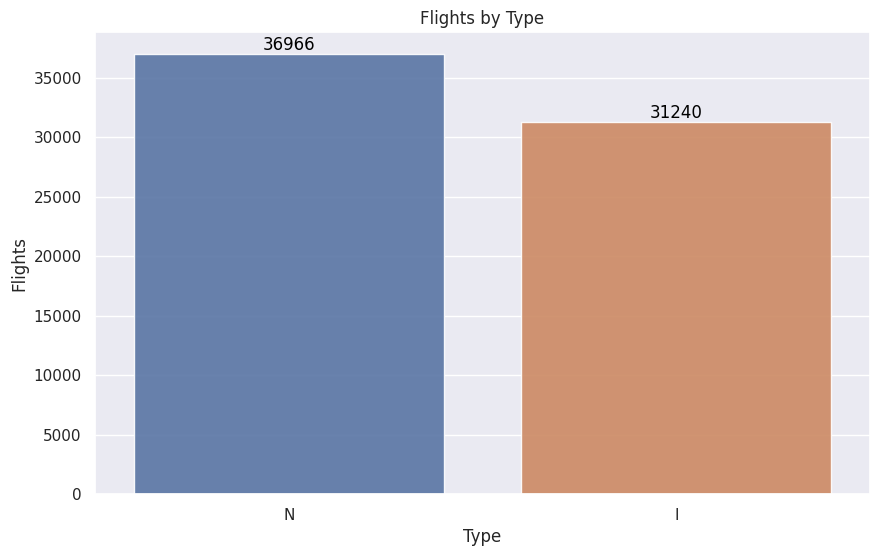

In [28]:
# Count the occurrences of each flight type
flights_by_type = data['TIPOVUELO'].value_counts().reset_index()
flights_by_type.columns = ['Type', 'Flights']

# Plotting
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Type', y='Flights', data=flights_by_type, alpha=0.9)

# Adding the values on top of the bars
for index, row in flights_by_type.iterrows():
    barplot.text(index, row.Flights, row.Flights, color='black', ha="center", va="bottom")

plt.title('Flights by Type')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

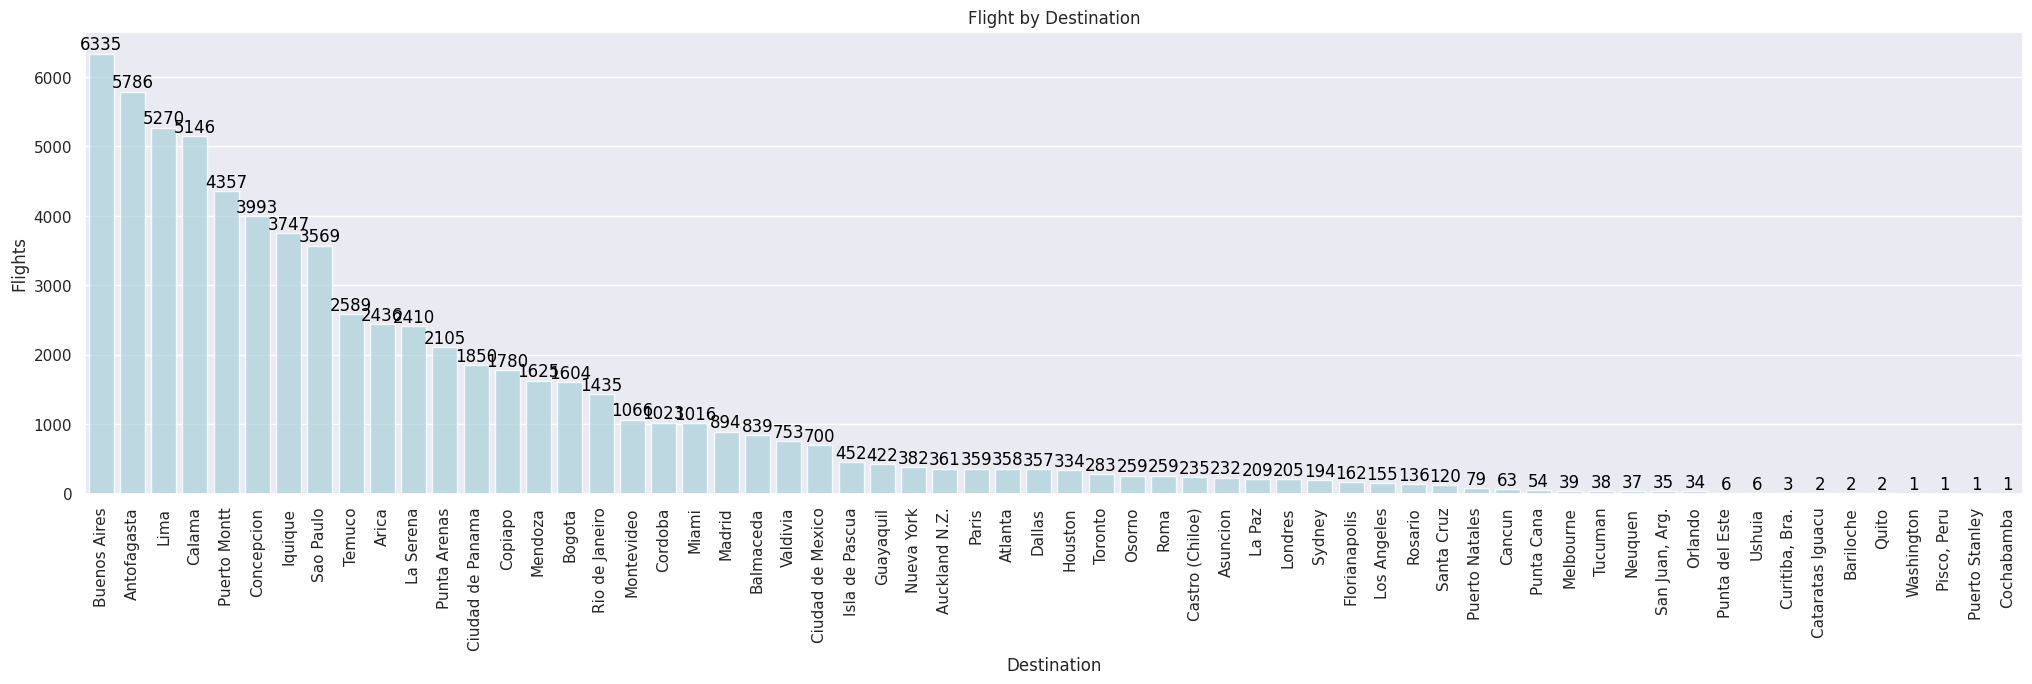

In [30]:
# Count the occurrences of each destination
flight_by_destination = data['SIGLADES'].value_counts().reset_index()
flight_by_destination.columns = ['Destination', 'Flights']

# Plotting
plt.figure(figsize=(25, 6))
sns.set(style="darkgrid")
barplot = sns.barplot(x='Destination', y='Flights', data=flight_by_destination, color='lightblue', alpha=0.8)

# Adding the values on top of the bars
for index, row in flight_by_destination.iterrows():
    barplot.text(index, row.Flights, row.Flights, color='black', ha="center", va="bottom")

plt.title('Flight by Destination')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## 2. Features Generation

### 2.a. Period of Day

In [31]:
from datetime import datetime

def get_period_day(date):
    date_time = datetime.strptime(date, '%Y-%m-%d %H:%M:%S').time()
    morning_min = datetime.strptime("05:00", '%H:%M').time()
    morning_max = datetime.strptime("11:59", '%H:%M').time()
    afternoon_min = datetime.strptime("12:00", '%H:%M').time()
    afternoon_max = datetime.strptime("18:59", '%H:%M').time()
    evening_min = datetime.strptime("19:00", '%H:%M').time()
    evening_max = datetime.strptime("23:59", '%H:%M').time()
    night_min = datetime.strptime("00:00", '%H:%M').time()
    night_max = datetime.strptime("4:59", '%H:%M').time()
    
    if(date_time > morning_min and date_time < morning_max):
        return 'mañana'
    elif(date_time > afternoon_min and date_time < afternoon_max):
        return 'tarde'
    elif(
        (date_time > evening_min and date_time < evening_max) or
        (date_time > night_min and date_time < night_max)
    ):
        return 'noche'

In [32]:
data['period_day'] = data['Fecha-I'].apply(get_period_day)

### 2.b. High Season

In [34]:
from datetime import datetime

def is_high_season(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0

In [35]:
data['high_season'] = data['Fecha-I'].apply(is_high_season)

### 2.c. Difference in Minutes

In [37]:
def get_min_diff(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    min_diff = ((fecha_o - fecha_i).total_seconds())/60
    return min_diff

In [38]:
data['min_diff'] = data.apply(get_min_diff, axis = 1)

### 2.d. Delay

In [39]:
threshold_in_minutes = 15
data['delay'] = np.where(data['min_diff'] > threshold_in_minutes, 1, 0)

In [40]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'period_day', 'high_season',
       'min_diff', 'delay'],
      dtype='object')

In [41]:
data

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,period_day,high_season,min_diff,delay
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,noche,1,3.0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,noche,1,9.0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,noche,1,9.0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,noche,1,3.0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,noche,1,-2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,tarde,1,46.0,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,tarde,1,16.0,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,tarde,1,40.0,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,tarde,1,13.0,0


## 3. Data Analysis: Second Sight

### Analysing new columns

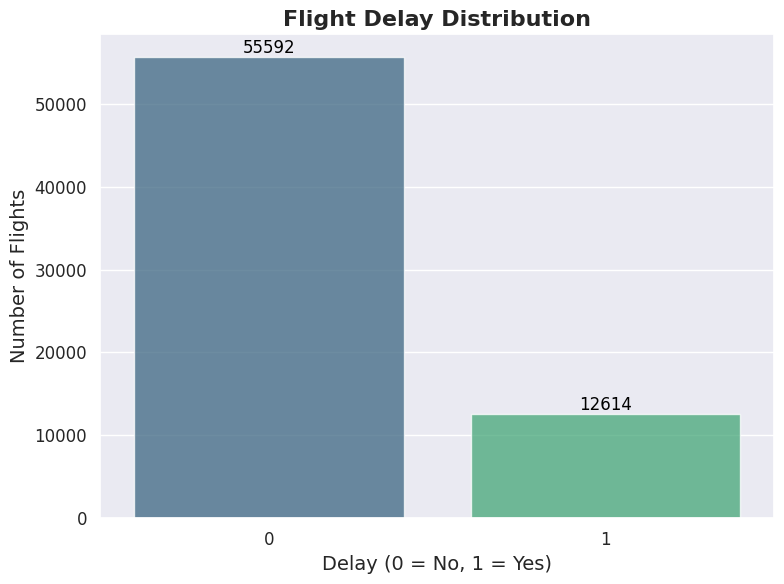

In [62]:
delay_counts = data['delay'].value_counts().reset_index()
delay_counts.columns = ['Delay', 'Count']

# Plotting
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
barplot = sns.barplot(x='Delay', y='Count', data=delay_counts, palette='viridis', alpha=0.75)

# Adding values on top of the bars
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=12, color='black')

# Title and labels
plt.title('Flight Delay Distribution', fontsize=16, weight='bold')
plt.ylabel('Number of Flights', fontsize=14)
plt.xlabel('Delay (0 = No, 1 = Yes)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

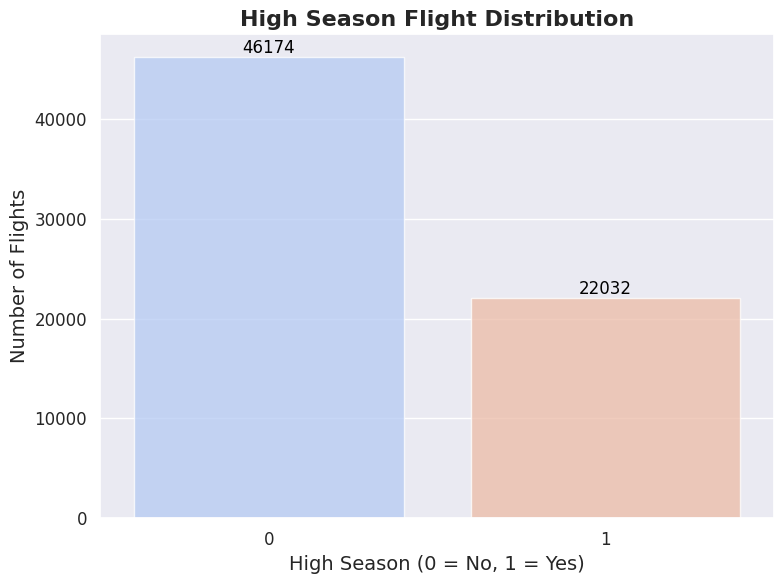

In [63]:
high_season_counts = data['high_season'].value_counts().reset_index()
high_season_counts.columns = ['High Season', 'Count']

# Plotting
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
barplot = sns.barplot(x='High Season', y='Count', data=high_season_counts, palette='coolwarm', alpha=0.75)

# Adding values on top of the bars
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=12, color='black')

# Title and labels
plt.title('High Season Flight Distribution', fontsize=16, weight='bold')
plt.ylabel('Number of Flights', fontsize=14)
plt.xlabel('High Season (0 = No, 1 = Yes)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

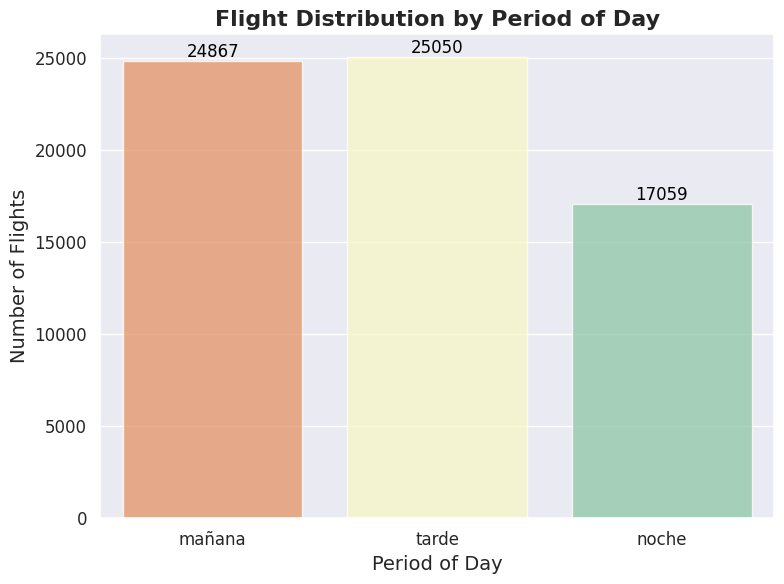

In [64]:
period_day_counts = data['period_day'].value_counts().reset_index()
period_day_counts.columns = ['Period of Day', 'Count']

# Sort the periods if you want a specific order (optional)
# For example, if you want to enforce the order: morning, afternoon, night
period_order = ['mañana', 'tarde', 'noche']
period_day_counts['Period of Day'] = pd.Categorical(period_day_counts['Period of Day'], categories=period_order, ordered=True)
period_day_counts = period_day_counts.sort_values('Period of Day')

# Plotting
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
barplot = sns.barplot(x='Period of Day', y='Count', data=period_day_counts, palette='Spectral', alpha=0.75)

# Adding values on top of the bars
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=12, color='black')

# Title and labels
plt.title('Flight Distribution by Period of Day', fontsize=16, weight='bold')
plt.ylabel('Number of Flights', fontsize=14)
plt.xlabel('Period of Day', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

### How is the delay rate across columns?

In [42]:
def get_rate_from_column(data, column):
    """
    Calculate the delay rate for a specified column in a DataFrame.

    This function computes the rate of delays for each unique value in the specified column. 
    It calculates the percentage of delayed flights relative to the total number of flights 
    for each category in the column."""
    delays = {}
    for _, row in data.iterrows():
        if row['delay'] == 1:
            if row[column] not in delays:
                delays[row[column]] = 1
            else:
                delays[row[column]] += 1
    total = data[column].value_counts().to_dict()
    
    rates = {}
    for name, total in total.items():
        if name in delays:
            rates[name] = round(total / delays[name], 2)
        else:
            rates[name] = 0
            
    return pd.DataFrame.from_dict(data = rates, orient = 'index', columns = ['Tasa (%)'])

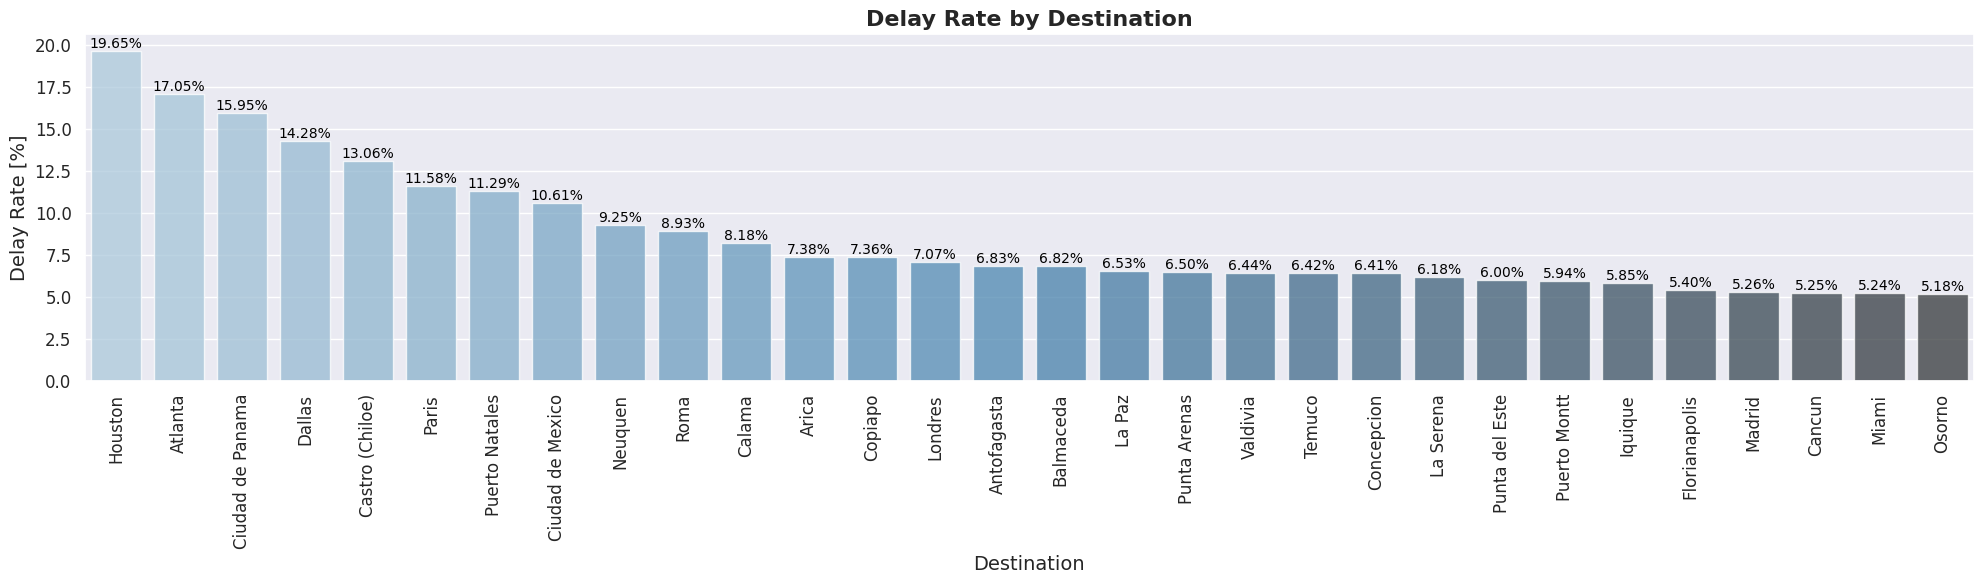

In [52]:
# Calculate the delay rate for each destination
destination_rate = get_rate_from_column(data, 'SIGLADES').reset_index()

# Rename the columns for clarity
destination_rate.columns = ['Destination', 'Delay Rate (%)']

# Sort the data by delay rate for better visualization
destination_rate = destination_rate.sort_values(by='Delay Rate (%)', ascending=False).head(30)

# Plotting
plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")
barplot = sns.barplot(data=destination_rate, y='Delay Rate (%)', x='Destination', palette='Blues_d', alpha=0.75)

# Adding values on top of the bars using the axes
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black')

# Title and labels
plt.title('Delay Rate by Destination', fontsize=16, weight='bold')
plt.ylabel('Delay Rate [%]', fontsize=14)
plt.xlabel('Destination', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

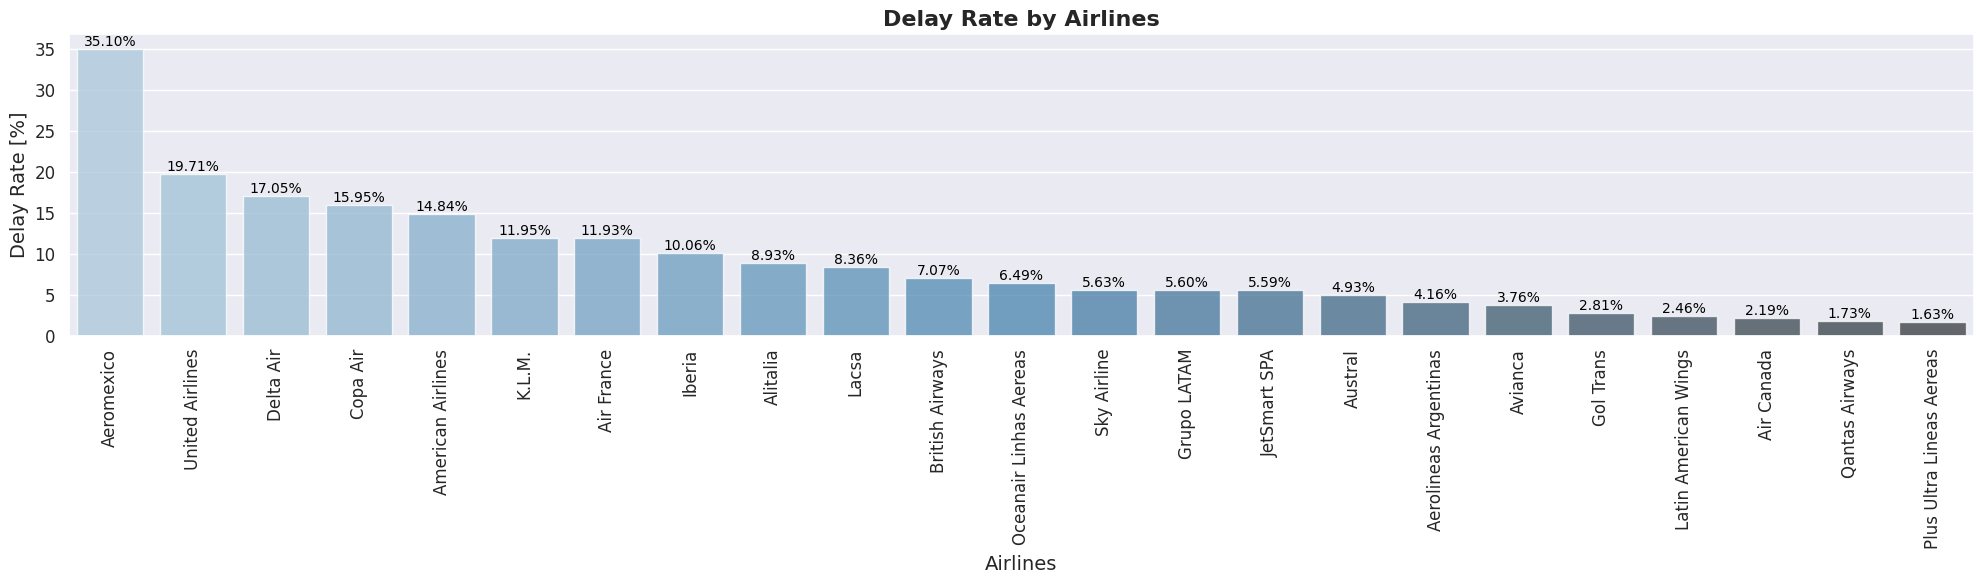

In [53]:
# Calculate the delay rate for each destination
destination_rate = get_rate_from_column(data, 'OPERA').reset_index()

# Rename the columns for clarity
destination_rate.columns = ['Airlines', 'Delay Rate (%)']

# Sort the data by delay rate for better visualization
destination_rate = destination_rate.sort_values(by='Delay Rate (%)', ascending=False)

# Plotting
plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")
barplot = sns.barplot(data=destination_rate, y='Delay Rate (%)', x='Airlines', palette='Blues_d', alpha=0.75)

# Adding values on top of the bars using the axes
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black')

# Title and labels
plt.title('Delay Rate by Airlines', fontsize=16, weight='bold')
plt.ylabel('Delay Rate [%]', fontsize=14)
plt.xlabel('Airlines', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

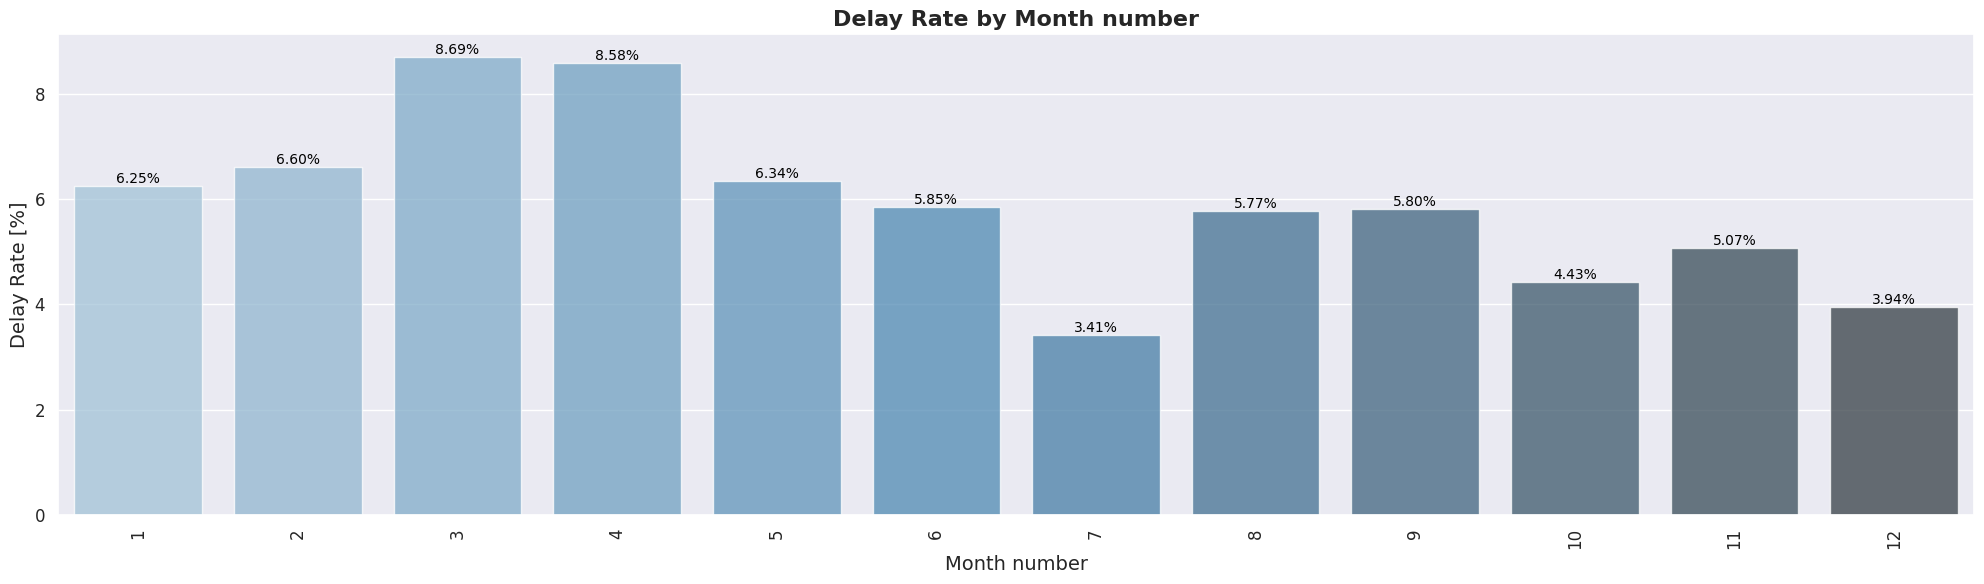

In [54]:
column_name = 'MES'
pretty_column_name = 'Month number'

# Calculate the delay rate for each destination
destination_rate = get_rate_from_column(data, column_name).reset_index()

# Rename the columns for clarity
destination_rate.columns = [pretty_column_name, 'Delay Rate (%)']

# Sort the data by delay rate for better visualization
destination_rate = destination_rate.sort_values(by='Delay Rate (%)', ascending=False)

# Plotting
plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")
barplot = sns.barplot(data=destination_rate, y='Delay Rate (%)', x=pretty_column_name, palette='Blues_d', alpha=0.75)

# Adding values on top of the bars using the axes
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black')

# Title and labels
plt.title(f'Delay Rate by {pretty_column_name}', fontsize=16, weight='bold')
plt.ylabel('Delay Rate [%]', fontsize=14)
plt.xlabel(f'{pretty_column_name}', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

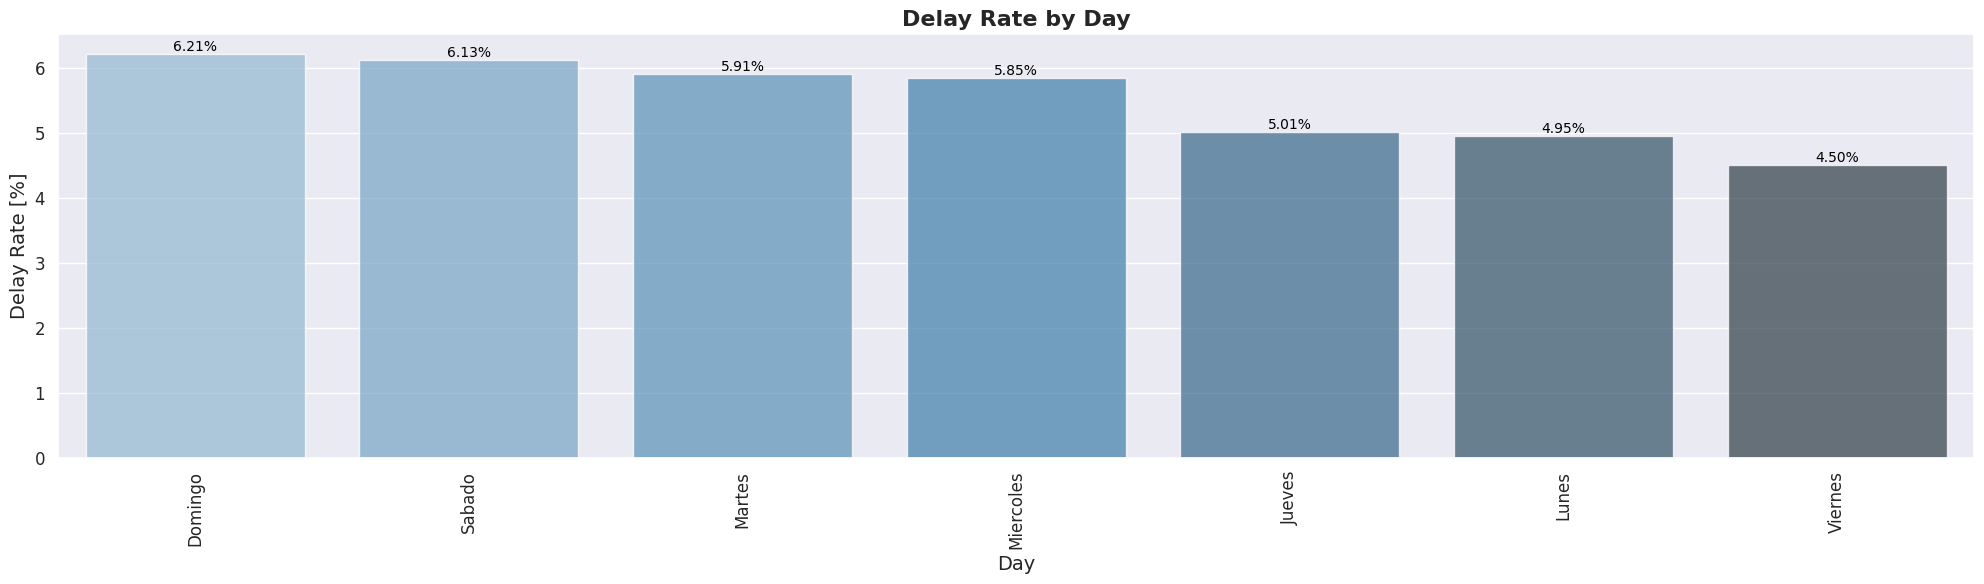

In [56]:
column_name = 'DIANOM'
pretty_column_name = 'Day'

# Calculate the delay rate for each destination
destination_rate = get_rate_from_column(data, column_name).reset_index()

# Rename the columns for clarity
destination_rate.columns = [pretty_column_name, 'Delay Rate (%)']

# Sort the data by delay rate for better visualization
destination_rate = destination_rate.sort_values(by='Delay Rate (%)', ascending=False)

# Plotting
plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")
barplot = sns.barplot(data=destination_rate, y='Delay Rate (%)', x=pretty_column_name, palette='Blues_d', alpha=0.75)

# Adding values on top of the bars using the axes
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black')

# Title and labels
plt.title(f'Delay Rate by {pretty_column_name}', fontsize=16, weight='bold')
plt.ylabel('Delay Rate [%]', fontsize=14)
plt.xlabel(f'{pretty_column_name}', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

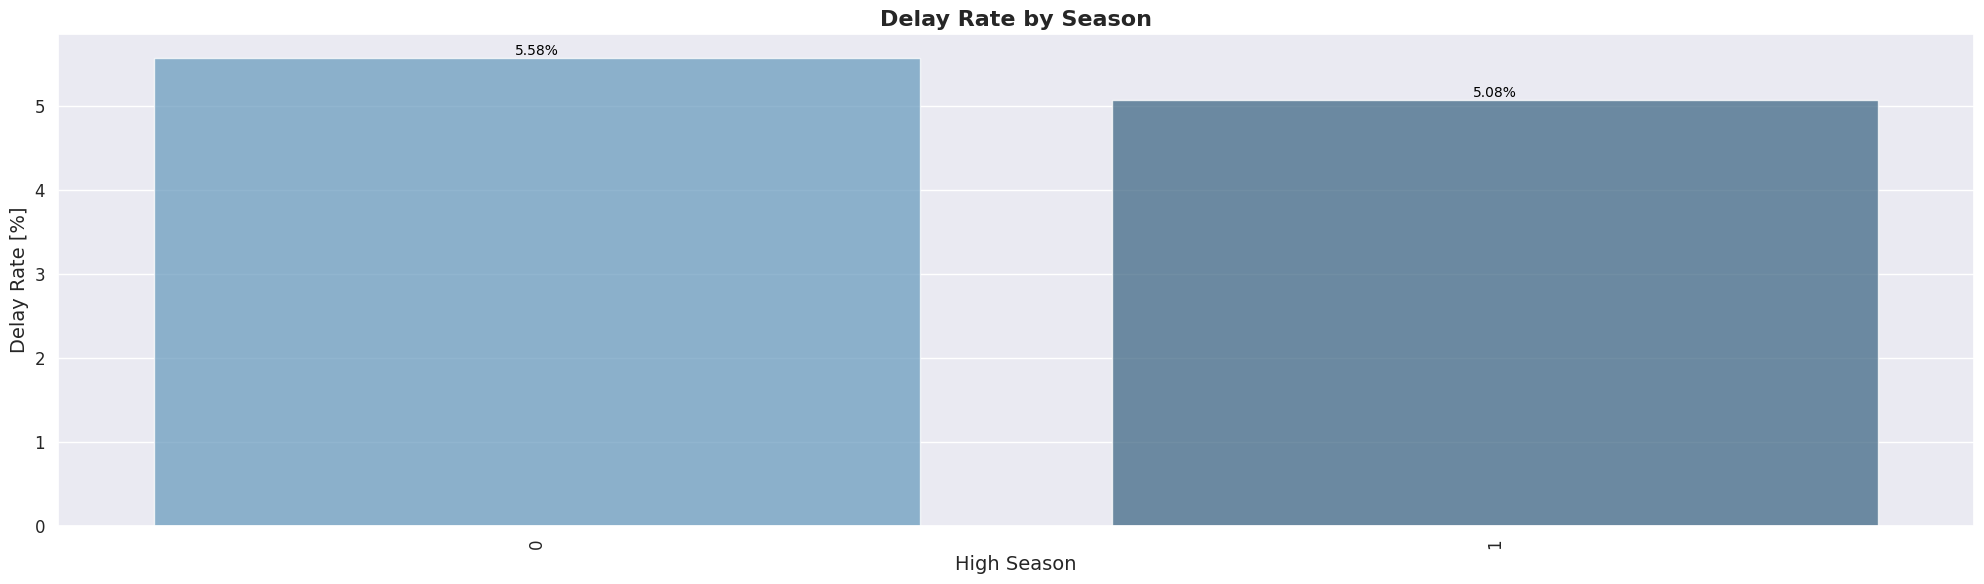

In [58]:
column_name = 'high_season'
pretty_column_name = 'Season'

# Calculate the delay rate for each destination
destination_rate = get_rate_from_column(data, column_name).reset_index()

# Rename the columns for clarity
destination_rate.columns = [pretty_column_name, 'Delay Rate (%)']

# Sort the data by delay rate for better visualization
destination_rate = destination_rate.sort_values(by='Delay Rate (%)', ascending=False)

# Plotting
plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")
barplot = sns.barplot(data=destination_rate, y='Delay Rate (%)', x=pretty_column_name, palette='Blues_d', alpha=0.75)

# Adding values on top of the bars using the axes
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black')

# Title and labels
plt.title(f'Delay Rate by {pretty_column_name}', fontsize=16, weight='bold')
plt.ylabel('Delay Rate [%]', fontsize=14)
plt.xlabel(f'High Season', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

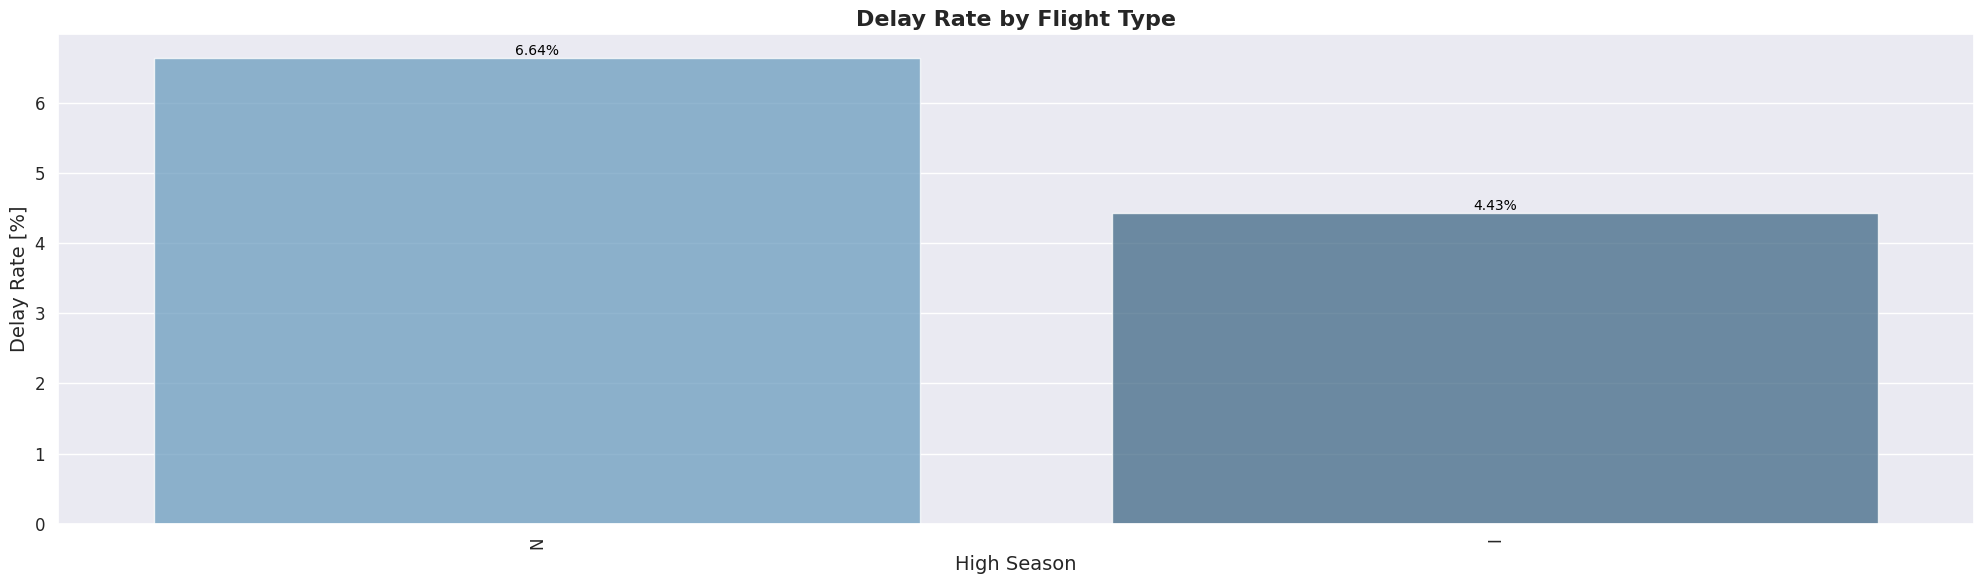

In [59]:
column_name = 'TIPOVUELO'
pretty_column_name = 'Flight Type'

# Calculate the delay rate for each destination
destination_rate = get_rate_from_column(data, column_name).reset_index()

# Rename the columns for clarity
destination_rate.columns = [pretty_column_name, 'Delay Rate (%)']

# Sort the data by delay rate for better visualization
destination_rate = destination_rate.sort_values(by='Delay Rate (%)', ascending=False)

# Plotting
plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")
barplot = sns.barplot(data=destination_rate, y='Delay Rate (%)', x=pretty_column_name, palette='Blues_d', alpha=0.75)

# Adding values on top of the bars using the axes
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black')

# Title and labels
plt.title(f'Delay Rate by {pretty_column_name}', fontsize=16, weight='bold')
plt.ylabel('Delay Rate [%]', fontsize=14)
plt.xlabel(f'High Season', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

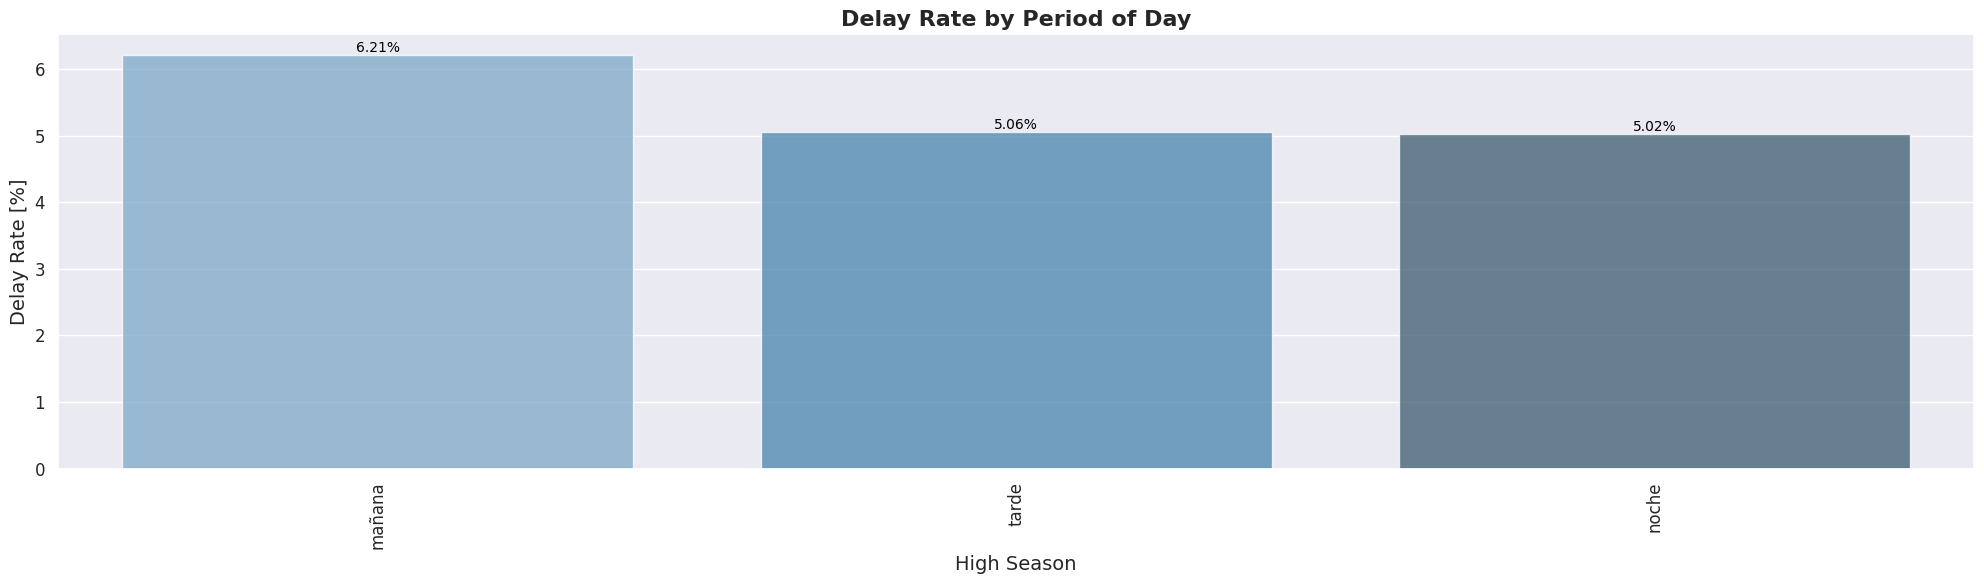

In [60]:
column_name = 'period_day'
pretty_column_name = 'Period of Day'

# Calculate the delay rate for each destination
destination_rate = get_rate_from_column(data, column_name).reset_index()

# Rename the columns for clarity
destination_rate.columns = [pretty_column_name, 'Delay Rate (%)']

# Sort the data by delay rate for better visualization
destination_rate = destination_rate.sort_values(by='Delay Rate (%)', ascending=False)

# Plotting
plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")
barplot = sns.barplot(data=destination_rate, y='Delay Rate (%)', x=pretty_column_name, palette='Blues_d', alpha=0.75)

# Adding values on top of the bars using the axes
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black')

# Title and labels
plt.title(f'Delay Rate by {pretty_column_name}', fontsize=16, weight='bold')
plt.ylabel('Delay Rate [%]', fontsize=14)
plt.xlabel(f'High Season', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

## 4. Training

### 4.a. Data Split (Training and Validation)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [67]:
training_data = shuffle(data[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'delay']], random_state = 111)

In [68]:
features = pd.concat([
    pd.get_dummies(data['OPERA'], prefix = 'OPERA'),
    pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), 
    pd.get_dummies(data['MES'], prefix = 'MES')], 
    axis = 1
)
target = data['delay']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.33, random_state = 42)

In [70]:
print(f"train shape: {x_train.shape} | test shape: {x_test.shape}")

train shape: (45698, 37) | test shape: (22508, 37)


In [71]:
y_train.value_counts('%')*100

0    81.618452
1    18.381548
Name: delay, dtype: float64

In [72]:
y_test.value_counts('%')*100

0    81.277768
1    18.722232
Name: delay, dtype: float64

### 4.b. Model Selection

#### 4.b.i. XGBoost

In [76]:
import xgboost as xgb
from xgboost import plot_importance

In [77]:
xgb_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [78]:
xgboost_y_preds = xgb_model.predict(x_test)
xgboost_y_preds = [1 if y_pred > 0.5 else 0 for y_pred in xgboost_y_preds]

In [79]:
confusion_matrix(y_test, xgboost_y_preds)

array([[18294,     0],
       [ 4214,     0]])

In [81]:
print(classification_report(y_test, xgboost_y_preds))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.00      0.00      0.00      4214

    accuracy                           0.81     22508
   macro avg       0.41      0.50      0.45     22508
weighted avg       0.66      0.81      0.73     22508



#### 4.b.ii. Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

LogisticRegression()

In [84]:
reg_y_preds = reg_model.predict(x_test)

In [85]:
confusion_matrix(y_test, reg_y_preds)

array([[18193,   101],
       [ 4086,   128]])

In [86]:
print(classification_report(y_test, reg_y_preds))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     18294
           1       0.56      0.03      0.06      4214

    accuracy                           0.81     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.81      0.74     22508



## 5. Data Analysis: Third Sight

### Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1000x500 with 0 Axes>

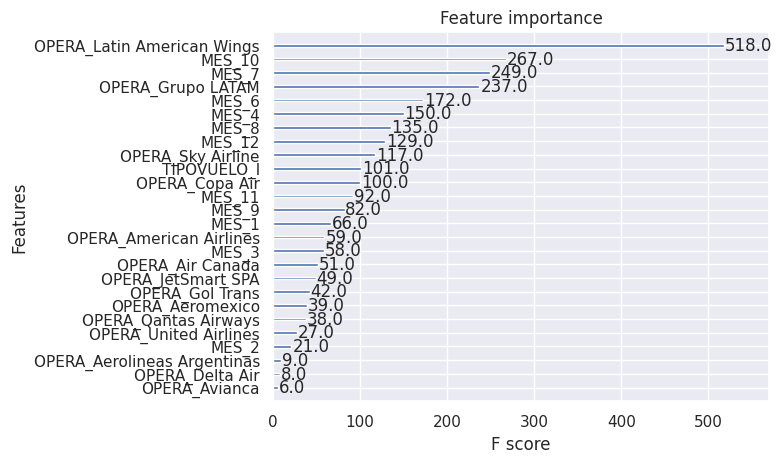

In [87]:
plt.figure(figsize = (10,5))
plot_importance(xgb_model)

In [88]:
top_10_features = [
    "OPERA_Latin American Wings", 
    "MES_7",
    "MES_10",
    "OPERA_Grupo LATAM",
    "MES_12",
    "TIPOVUELO_I",
    "MES_4",
    "MES_11",
    "OPERA_Sky Airline",
    "OPERA_Copa Air"
]

### Data Balance

In [89]:
n_y0 = len(y_train[y_train == 0])
n_y1 = len(y_train[y_train == 1])
scale = n_y0/n_y1
print(scale)

4.4402380952380955


## 6. Training with Improvement

### 6.a. Data Split

In [90]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features[top_10_features], target, test_size = 0.33, random_state = 42)

### 6.b. Model Selection

#### 6.b.i. XGBoost with Feature Importance and with Balance

In [91]:
xgb_model_2 = xgb.XGBClassifier(random_state=1, learning_rate=0.01, scale_pos_weight = scale)
xgb_model_2.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [92]:
xgboost_y_preds_2 = xgb_model_2.predict(x_test2)

In [93]:
confusion_matrix(y_test2, xgboost_y_preds_2)

array([[9556, 8738],
       [1313, 2901]])

In [94]:
print(classification_report(y_test2, xgboost_y_preds_2))

              precision    recall  f1-score   support

           0       0.88      0.52      0.66     18294
           1       0.25      0.69      0.37      4214

    accuracy                           0.55     22508
   macro avg       0.56      0.61      0.51     22508
weighted avg       0.76      0.55      0.60     22508



#### 6.b.ii. XGBoost with Feature Importance but without Balance

In [95]:
xgb_model_3 = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model_3.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [96]:
xgboost_y_preds_3 = xgb_model_3.predict(x_test2)

In [97]:
confusion_matrix(y_test2, xgboost_y_preds_3)

array([[18286,     8],
       [ 4188,    26]])

In [98]:
print(classification_report(y_test2, xgboost_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.76      0.01      0.01      4214

    accuracy                           0.81     22508
   macro avg       0.79      0.50      0.45     22508
weighted avg       0.80      0.81      0.73     22508



#### 6.b.iii. Logistic Regression with Feature Importante and with Balance

In [99]:
reg_model_2 = LogisticRegression(class_weight={1: n_y0/len(y_train), 0: n_y1/len(y_train)})
reg_model_2.fit(x_train2, y_train2)

LogisticRegression(class_weight={0: 0.18381548426626987, 1: 0.8161845157337302})

In [100]:
reg_y_preds_2 = reg_model_2.predict(x_test2)

In [101]:
confusion_matrix(y_test2, reg_y_preds_2)

array([[9487, 8807],
       [1314, 2900]])

In [102]:
print(classification_report(y_test2, reg_y_preds_2))

              precision    recall  f1-score   support

           0       0.88      0.52      0.65     18294
           1       0.25      0.69      0.36      4214

    accuracy                           0.55     22508
   macro avg       0.56      0.60      0.51     22508
weighted avg       0.76      0.55      0.60     22508



#### 6.b.iv. Logistic Regression with Feature Importante but without Balance

In [103]:
reg_model_3 = LogisticRegression()
reg_model_3.fit(x_train2, y_train2)

LogisticRegression()

In [104]:
reg_y_preds_3 = reg_model_3.predict(x_test2)

In [105]:
confusion_matrix(y_test2, reg_y_preds_3)

array([[18246,    48],
       [ 4160,    54]])

In [106]:
print(classification_report(y_test2, reg_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.53      0.01      0.03      4214

    accuracy                           0.81     22508
   macro avg       0.67      0.51      0.46     22508
weighted avg       0.76      0.81      0.73     22508



## 7. Data Science Conclusions

By looking at the results of the 6 trained models, it can be determined:
- There is no noticeable difference in results between XGBoost and LogisticRegression.
- Does not decrease the performance of the model by reducing the features to the 10 most important.
- Improves the model's performance when balancing classes, since it increases the recall of class "1".

**With this, the model to be productive must be the one that is trained with the top 10 features and class balancing, but which one?**